# Libraries

In [9]:
# tensorflow utils
import tensorflow as tf

# matplotlib utils
import matplotlib as mpl
import matplotlib.pyplot as plt

# other utils
import foolbox as fb
import numpy as np
import pandas as pd
import seaborn as sn

# local config
mpl.rcParams['font.family'] = 'monospace'

# Test :: Classic MNIST

## Datasets

In [10]:
( (p_images, p_labels),
  (q_images, q_labels), ) = tf.keras.datasets.mnist.load_data()

# normalize
p_images = p_images / 255.0
q_images = q_images / 255.0

# convert to tensors
q_images = tf.convert_to_tensor(q_images, dtype=tf.float32)
q_labels = tf.convert_to_tensor(q_labels, dtype=tf.int32)

## Model

In [11]:
model = tf.keras.models.load_model('../models/adv/classic_mnist.cauchy.keras')

fmodel = fb.TensorFlowModel(model=model, bounds=(0, 1))
attack = fb.attacks.LinfFastGradientAttack()

## Visualize

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.9681 - loss: 0.1030
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - accuracy: 0.9349 - loss: 0.2244
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.8779 - loss: 0.4142
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.7992 - loss: 0.6732
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.7065 - loss: 1.0169
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.6277 - loss: 1.4216
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step


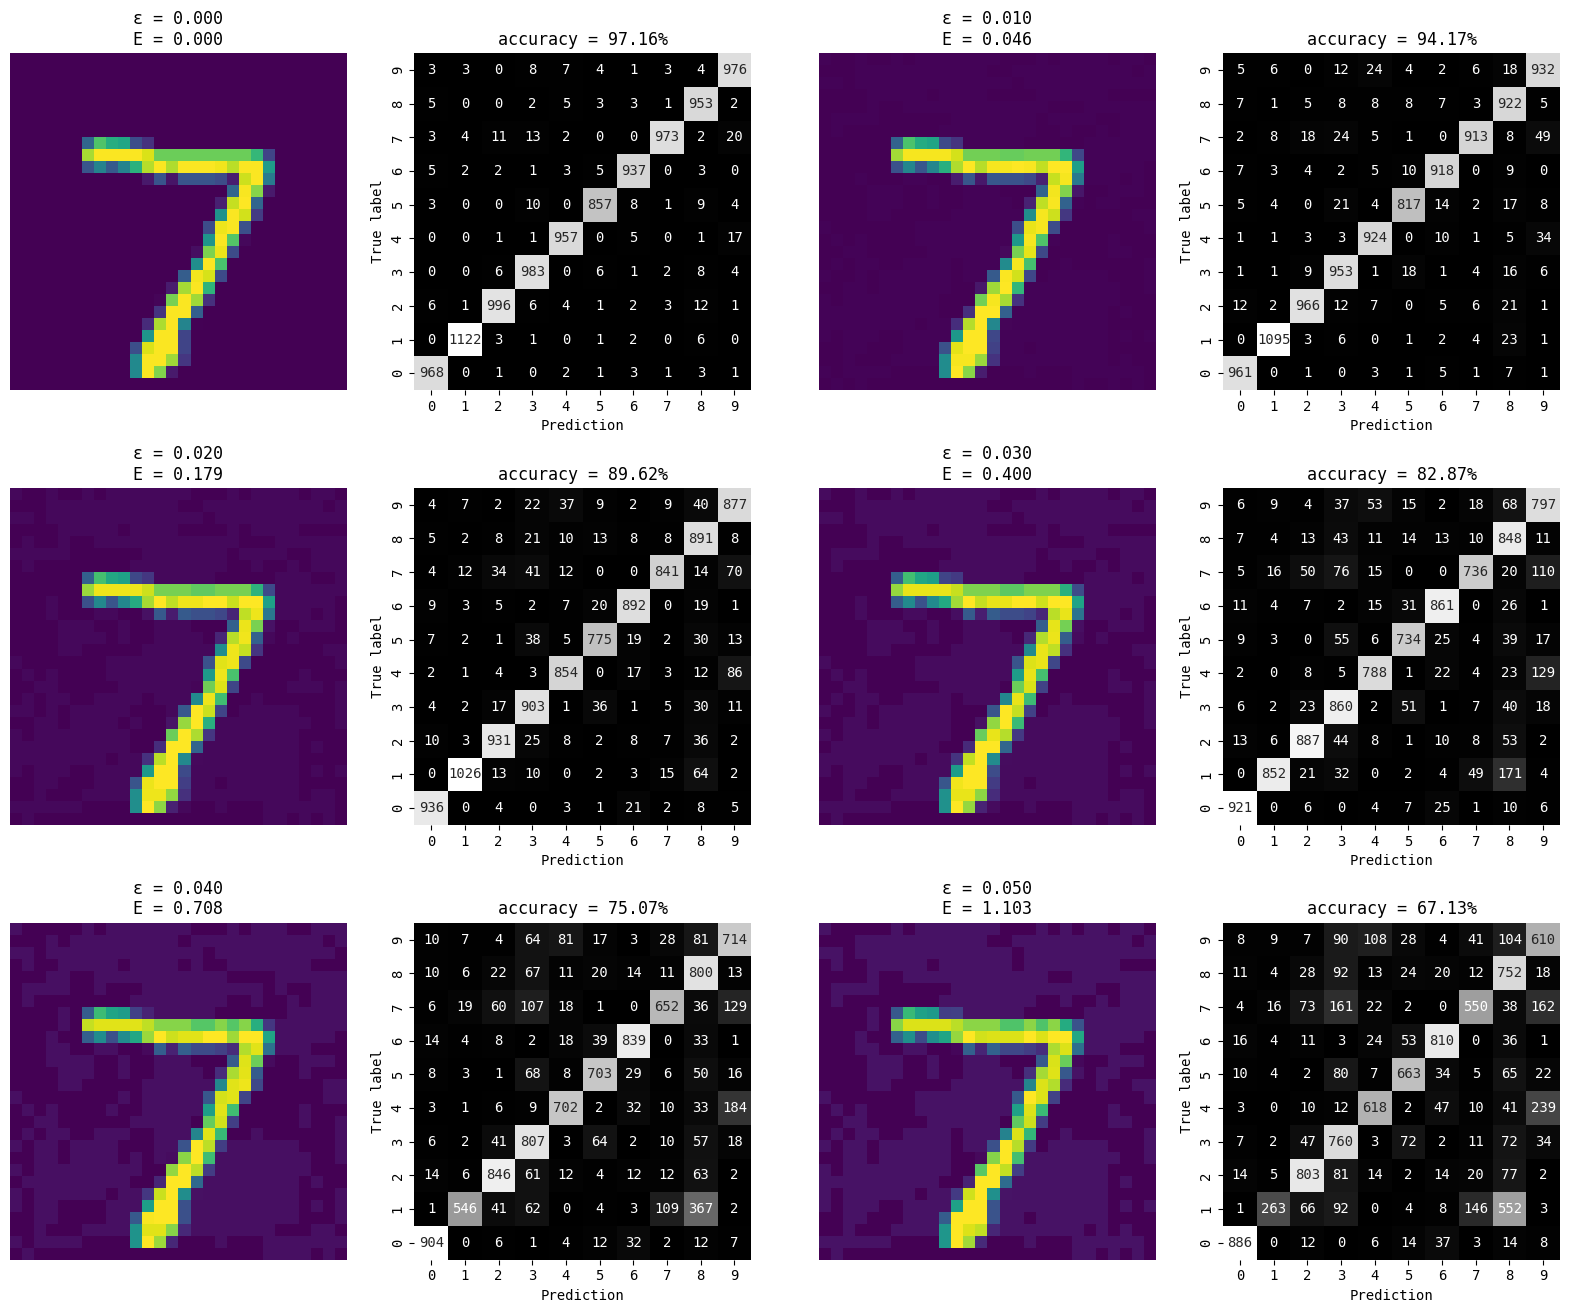

In [12]:
plt.figure(figsize=(20, 16))

attack_x = []
attack_y1 = []
attack_y2 = []

i = 0

for attack_lvl in np.linspace(0, 0.05, num=6):
    f_images = attack(fmodel, q_images, q_labels, epsilons=attack_lvl)[1]
    
    # evaluation
    attack_acc = model.evaluate(f_images, q_labels)[1]
    attack_ene = ((q_images - f_images) ** 2).numpy().sum() / q_images.shape[0]

    # prediction & confusion
    q_pred = model.predict(f_images).argmax(-1)
    q_conf = tf.math.confusion_matrix(q_labels, q_pred)
    
    # statistics
    attack_x.append(attack_lvl)
    attack_y1.append(attack_ene)
    attack_y2.append(attack_acc)

    # visualize distorted image
    plt.subplot(3, 4, i + 1)
    plt.axis('off')
    plt.title(f'ε = {attack_lvl:.3f}\nΕ = {attack_ene:.3f}')
    plt.imshow(f_images[0])

    # visualize confusion matrix
    plt.subplot(3, 4, i + 2)
    sn.heatmap(pd.DataFrame(q_conf), annot=True, cbar=False, cmap='gist_gray', fmt='g', square=True).invert_yaxis()
    plt.title(f'accuracy = {attack_acc:.2%}')
    plt.xlabel('Prediction')
    plt.ylabel('True label')
    
    # increment
    i = i + 2

plt.show()

## Conceive

<Figure size 640x480 with 0 Axes>

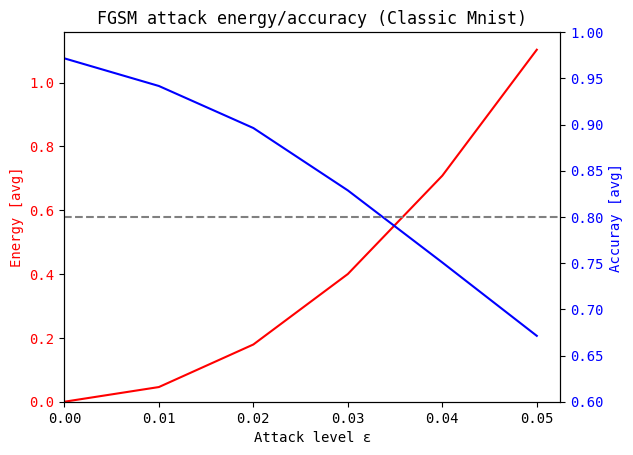

In [13]:
plt.figure()

ax1 = plt.subplots()[1]
ax2 = ax1.twinx()

# X / Y1
ax1.set_title('FGSM attack energy/accuracy (Classic Mnist)')
ax1.set_xlabel('Attack level ε')
ax1.set_ylabel('Energy [avg]', color='red')
ax1.plot(attack_x, attack_y1, color='red')
ax1.tick_params(axis ='y', labelcolor='red')
ax1.set_xlim(0)
ax1.set_ylim(0)

# X / Y2
ax2.set_ylabel('Accuray [avg]', color='blue')
ax2.plot(attack_x, attack_y2, color='blue')
ax2.tick_params(axis ='y', labelcolor='blue')
ax2.hlines(y=0.8, xmin=0, xmax=1, linestyle='--', color='gray')
ax2.set_ylim(0.6, 1)

plt.show()

# Test :: Fashion MNIST

## Datasets

In [14]:
( (p_images, p_labels),
  (q_images, q_labels), ) = tf.keras.datasets.fashion_mnist.load_data()

# normalize
p_images = p_images / 255.0
q_images = q_images / 255.0

# convert to tensors
q_images = tf.convert_to_tensor(q_images, dtype=tf.float32)
q_labels = tf.convert_to_tensor(q_labels, dtype=tf.int32)

## Model

In [15]:
model = tf.keras.models.load_model('../models/adv/fashion_mnist.cauchy.keras')

fmodel = fb.TensorFlowModel(model=model, bounds=(0, 1))
attack = fb.attacks.LinfFastGradientAttack()

## Visualize

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9107 - loss: 0.2565
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8500 - loss: 0.4415
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8052 - loss: 0.5945
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7652 - loss: 0.7208
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.7294 - loss: 0.8405
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.7021 - loss: 0.9504
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


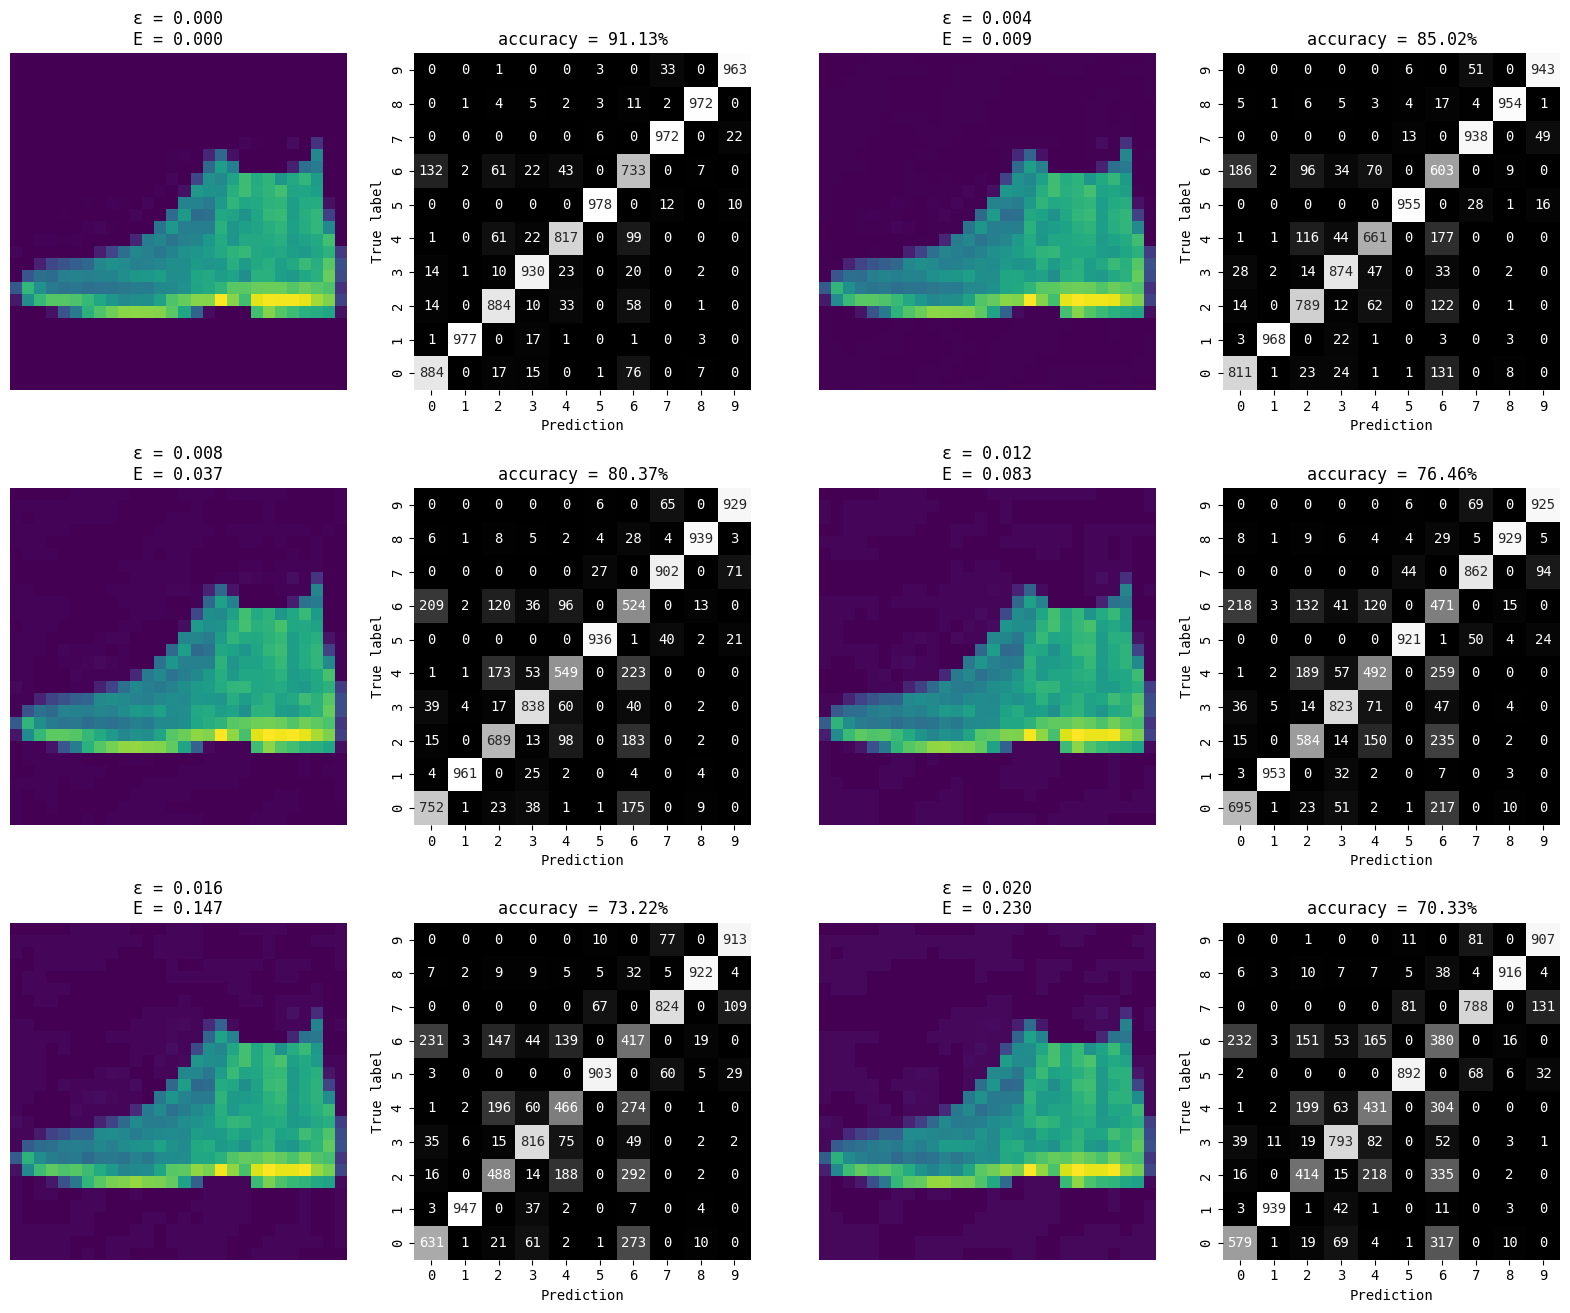

In [16]:
plt.figure(figsize=(20, 16))

attack_x = []
attack_y1 = []
attack_y2 = []

i = 0

for attack_lvl in np.linspace(0, 0.02, num=6):
    f_images = attack(fmodel, q_images, q_labels, epsilons=attack_lvl)[1]
    
    # evaluation
    attack_acc = model.evaluate(f_images, q_labels)[1]
    attack_ene = ((q_images - f_images) ** 2).numpy().sum() / q_images.shape[0]

    # prediction & confusion
    q_pred = model.predict(f_images).argmax(-1)
    q_conf = tf.math.confusion_matrix(q_labels, q_pred)
    
    # statistics
    attack_x.append(attack_lvl)
    attack_y1.append(attack_ene)
    attack_y2.append(attack_acc)

    # visualize distorted image
    plt.subplot(3, 4, i + 1)
    plt.axis('off')
    plt.title(f'ε = {attack_lvl:.3f}\nΕ = {attack_ene:.3f}')
    plt.imshow(f_images[0])

    # visualize confusion matrix
    plt.subplot(3, 4, i + 2)
    sn.heatmap(pd.DataFrame(q_conf), annot=True, cbar=False, cmap='gist_gray', fmt='g', square=True).invert_yaxis()
    plt.title(f'accuracy = {attack_acc:.2%}')
    plt.xlabel('Prediction')
    plt.ylabel('True label')
    
    # increment
    i = i + 2

plt.show()

## Conceive

<Figure size 640x480 with 0 Axes>

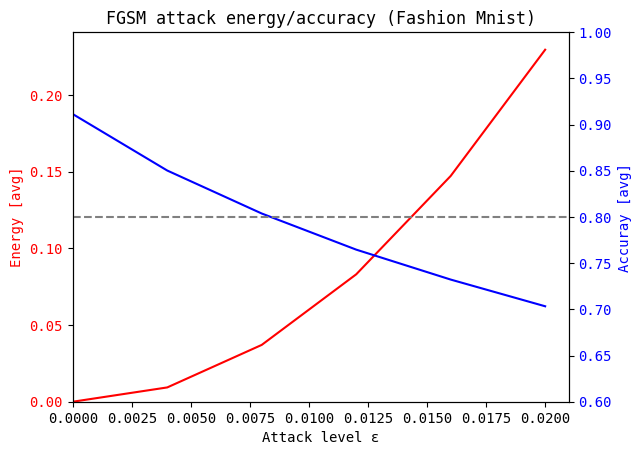

In [17]:
plt.figure()

ax1 = plt.subplots()[1]
ax2 = ax1.twinx()

# X / Y1
ax1.set_title('FGSM attack energy/accuracy (Fashion Mnist)')
ax1.set_xlabel('Attack level ε')
ax1.set_ylabel('Energy [avg]', color='red')
ax1.plot(attack_x, attack_y1, color='red')
ax1.tick_params(axis ='y', labelcolor='red')
ax1.set_xlim(0)
ax1.set_ylim(0)

# X / Y2
ax2.set_ylabel('Accuray [avg]', color='blue')
ax2.plot(attack_x, attack_y2, color='blue')
ax2.tick_params(axis ='y', labelcolor='blue')
ax2.hlines(y=0.8, xmin=0, xmax=1, linestyle='--', color='gray')
ax2.set_ylim(0.6, 1)

plt.show()